### Looking at Distributions for Quantitative Variable

There are several tools for looking at the distribution of a single quantitative variable.  A distribution is the values that a feature/variable takes and how often it takes those values. Below we will focus on graphical summaries and numerical summaries.  The goal of any graphical summary is to get a quick understanding of our data.



In [46]:
# Load in packages we need for doing graphical representations.  
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors

import scipy.stats as stats


We will be using the Ames Housing Dataset which is part of a competition to predict housing prices
https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset

The ultimate goal of the project is to predict the sales price of a house in Ames, IA based upon various measurements/features recorded for the house.

Note that these data have some missing values for some of the features/variables.

In [47]:
# read in the data to dataframe called ames
ames = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv", na_values=['?'])
# replace the ? in the data with NaN for missing values
ames.replace([' ?'],np.NaN)
# show information about the dataframe
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Histograms
We will start with histograms for getting graphical summaries of the distribution of a quantitative variable.  A histogram is a series of bars whose height is proportional to the values that fall within the bins that go with the bars.  Bars and bins must be of equal widths.

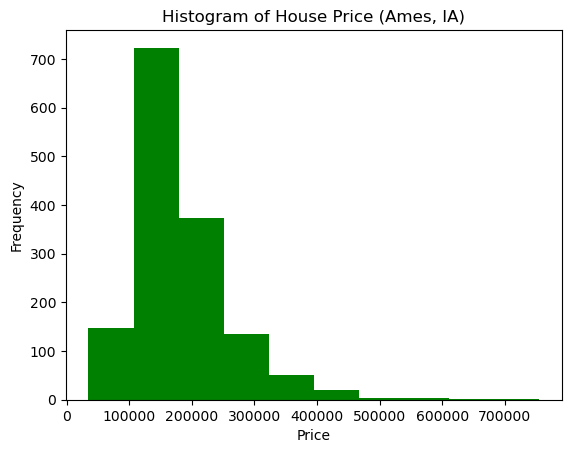

In [48]:
# make a green histogram
plt.hist(ames['SalePrice'], color="green")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Price (Ames, IA)')
plt.show()



The above plot is right skewed (long right tail) and it is unimodal.  There are possible outliers in right tail.



#### Boxplots
A boxplot is another graphical summary for visualizing a distribution.  A boxplot consists of five parallel lines.  The five lines are defined by the minimum, the 25th percentile, the median (50th percentile), the 75th percentile and the maximum.  The box of a _boxplot_ represents the middle 50%, between the 75th percentile and the 25th percentile, of the data.  Boxplots generally also display outliers as points outside the five lines.  When outliers are present, the minimum and maximum are replaced among the lines by the smallest and largest values, respectively, that are *not* outliers.   

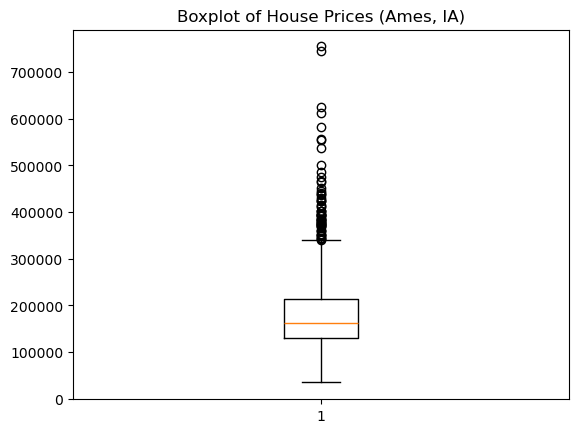

In [49]:
# create a boxplot of SalePrice
plt.boxplot(ames['SalePrice'])
plt.title('Boxplot of House Prices (Ames, IA)')
plt.show()

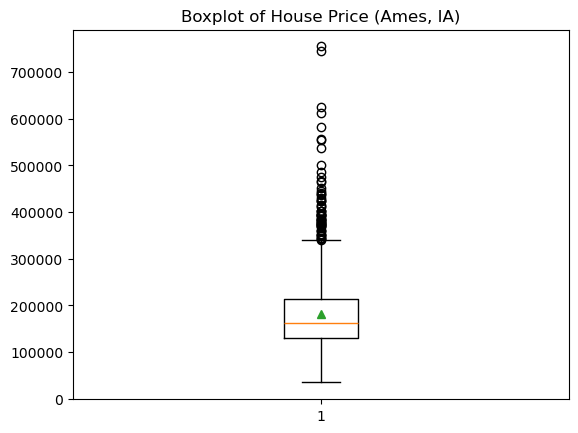

In [50]:
# create a boxplot of SalePrice with means added
plt.boxplot(ames['SalePrice'], showmeans=True)
plt.title('Boxplot of House Price (Ames, IA)')
plt.show()

#### Violinplots
One of the drawbacks of a boxplot is that it does not show the shape of the distribution.  A violinplot is similar to a boxplot but it combines the shape of a histogram with the form of the boxplot. 

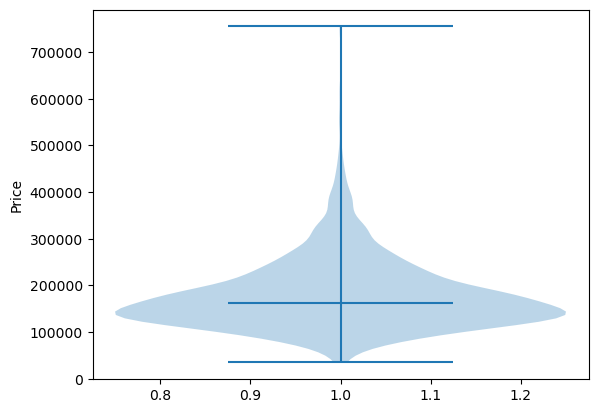

In [51]:
# here we use two options that add the median and the extrema (min, max) to the plot
plt.violinplot(ames['SalePrice'],showmedians=True, showextrema=True)
plt.ylabel('Price')
plt.show()


Let's look at another variable GrLivArea which is 'Above grade (ground) living area square feet'.  


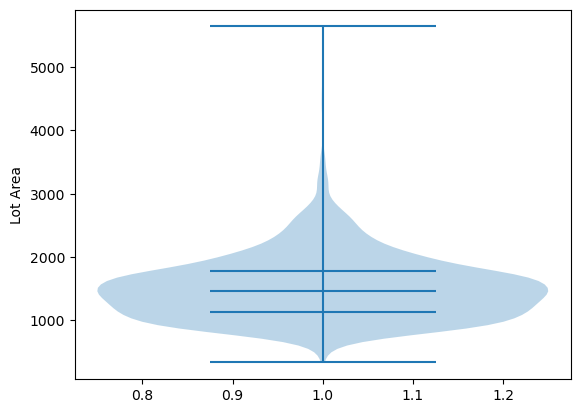

In [52]:
# look at another feature GrLivArea and add max, min, median, 25th and 75th percentiles
plt.violinplot(ames['GrLivArea'], showextrema=True,showmedians=True,quantiles=[0.25,0.75])
plt.ylabel('Lot Area')
plt.show()


Here's the code to make the histogram for the same feature, GrLivArea.

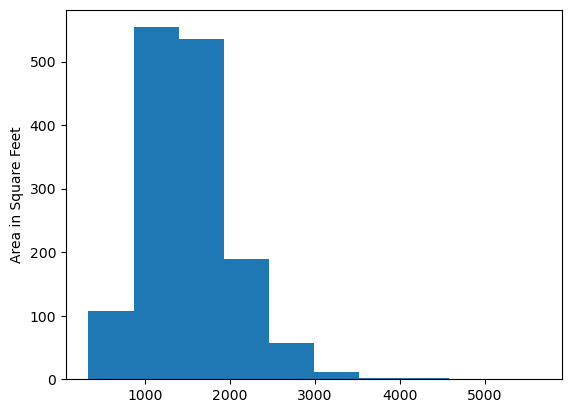

In [53]:
plt.hist(ames['GrLivArea'])
# add a label to the y-axis
plt.ylabel('Area in Square Feet')
plt.show()

Next we will make a histogram for _GarageYrBlt_ which I think means the year that the garage was built.  The code below is for making this histogram but the X-axis is muddled.

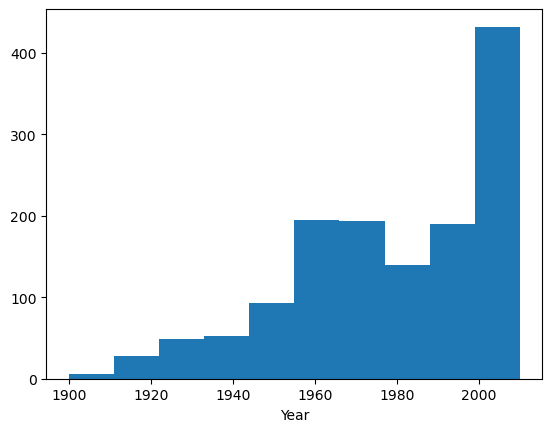

In [54]:
plt.hist(ames['GarageYrBlt'])
plt.xlabel('Year')
plt.show()

So we'll start by getting the smallest (_np.min_) and the largest (_np.max_) values from this feature.  

In [55]:
print(np.min(ames['GarageYrBlt']))
print(np.max(ames['GarageYrBlt']))


1900.0
2010.0


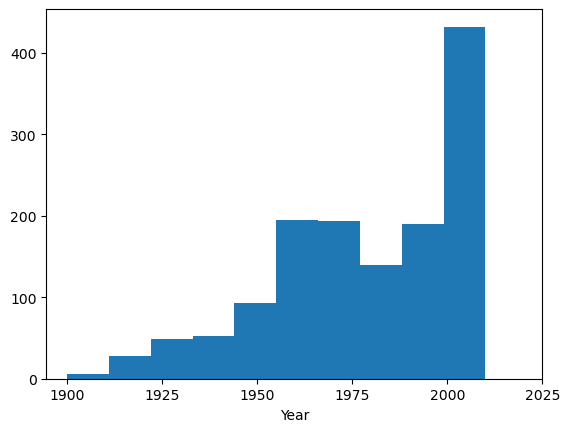

In [56]:
#In the plt.xticks line below we add the tick mark values that we want
plt.hist(ames['GarageYrBlt'])
plt.xlabel('Year')
#plt.ylabel('Median Age')
#plt.title('Histogram')
plt.xticks([1900, 1925, 1950, 1975, 2000, 2025])
plt.show()


#### Numerical summaries
There are generally three types of numerical summaries for quantitative variables
1. measures of center: mean, median
2. measures of spread: range, standard deviation, interquartile range
3. measure of location: percentiles, z-scores

In [57]:
# measures of center

print("Mean of Sale Price is ", np.mean(ames['SalePrice']))
print("Median of Sale Price is ", np.median(ames['SalePrice']))
# measures of spread
print("Standard deviation of Sale Price is ", np.std(ames['SalePrice']))
print("The interquartile range of Sale Price is ", np.subtract(*np.percentile(ames['SalePrice'], [75, 25])))
# measures of location
print("A house with a Sale Price of 150,000 is the ", stats.percentileofscore(ames['SalePrice'], 150000), "th percentile")
mean_sale = np.mean(ames['SalePrice'])
sd_sale = np.std(ames['SalePrice'])
print("A house with a Sale Price of 150,000 has a z-score of ", (150000-mean_sale)/sd_sale)

Mean of Sale Price is  180921.19589041095
Median of Sale Price is  163000.0
Standard deviation of Sale Price is  79415.29188606751
The interquartile range of Sale Price is  84025.0
A house with a Sale Price of 150,000 is the  42.294520547945204 th percentile
A house with a Sale Price of 150,000 has a z-score of  -0.38936072834400437


In [58]:
# all of the above but with rounding
# measures of center
print("Mean of Sale Price is ", np.round(np.mean(ames['SalePrice']),2))
print("Median of Sale Price is ", np.median(ames['SalePrice']))
# measures of spread
print("Standard deviation of Sale Price is ", np.round(np.std(ames['SalePrice']),2))
print("The interquartile range of Sale Price is ", np.subtract(*np.percentile(ames['SalePrice'], [75, 25])))
# measures of location
print("A house with a Sale Price of 150,000 is the ", np.round(stats.percentileofscore(ames['SalePrice'], 150000),2), "th percentile")
# for getting the z-score we need to store the mean and standard deviation
mean_sale = np.mean(ames['SalePrice'])
sd_sale = np.std(ames['SalePrice'])
print("A house with a Sale Price of 150,000 has a z-score of ", np.round((150000-mean_sale)/sd_sale,3))
print("z score is showing the number of standard deviations from the mean")

Mean of Sale Price is  180921.2
Median of Sale Price is  163000.0
Standard deviation of Sale Price is  79415.29
The interquartile range of Sale Price is  84025.0
A house with a Sale Price of 150,000 is the  42.29 th percentile
A house with a Sale Price of 150,000 has a z-score of  -0.389
z score is showing the number of standard deviations from the mean


#### Summarizing about Quantitative Distributions

When we want to communicate with someone else about a distribution, we generally focus on several attributes of the distribution.  First the center of the distribution, either the mean of the median.  If the distribution is skewed, the median is preferred.  Second, the spread of the distribution, generally using the standard deviation or the interquartile range (IQR) .  Generally, standard deviations are used with symmetric distributions, while the IQR is used with skewed distributions.  Finally, if there are unusual observations, they should be mentioned.  When you are writing about data, it nearly always useful to add a picture of the distribution 


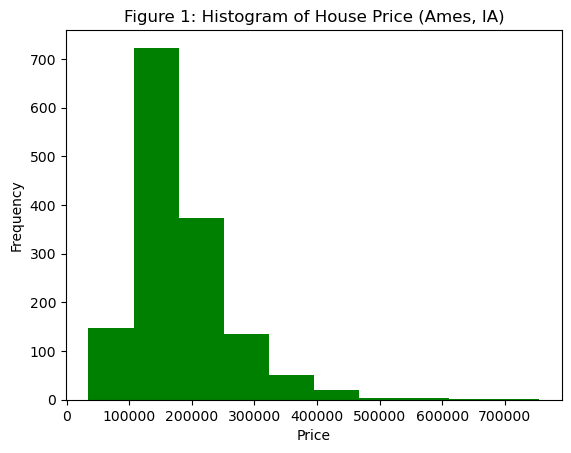

In [59]:
# make a green histogram
plt.hist(ames['SalePrice'], color="green")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Figure 1: Histogram of House Price (Ames, IA)')
plt.show()

So a summary of the _SalePrice_ feature from above, might good like this:

Data was collected the sale price of a sample of homes from Ames, Iowa.  The median home price of these data had a sale price of $163000 while the middle half of the data had a spread of about $84000.  There were at least a dozen houses with sale prices larger than $450000.  See Figure 1 above which is a histogram for these sale prices. 



## Tasks 1

+  Make a histograph for the variable _Garage Area_ which is the 'Size of garage in square feet' with tick marks at 300, 600, 900, 1200 and 1500 square feet.

+ Make  a violinplot for the variable _Garage Area_ which is the 'Size of garage in square feet'.  What is the median size of a garage among these houses?  

+ For the two graphs you made in the previous part, which do you prefer and why?  If you were presenting information about _Garage Area_ to a realtor which graph would you use and why?

+ Create a boxplot for the variable _Year Built_.

+ Find the z-score for a house with a _Garage Area_ of 600 square feet.  Interpret that value.

+ Write a one paragraph summary of the distribution of the variable _TotTms AbvGrd_ (Total rooms above grade (does not include bathrooms)).  Choose an appropriate graph to go with your paragraph.

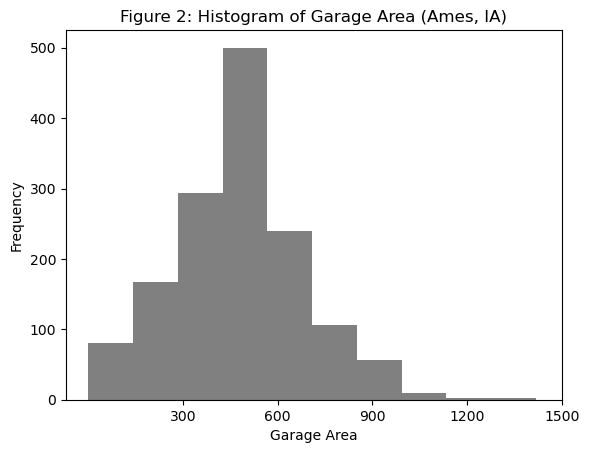

In [60]:
# create a histogram for the variable Garage Area
plt.hist(ames['GarageArea'], color="gray")
plt.xlabel('Garage Area')
plt.ylabel('Frequency')
plt.title('Figure 2: Histogram of Garage Area (Ames, IA)')
plt.xticks([300, 600, 900, 1200, 1500])
plt.show()

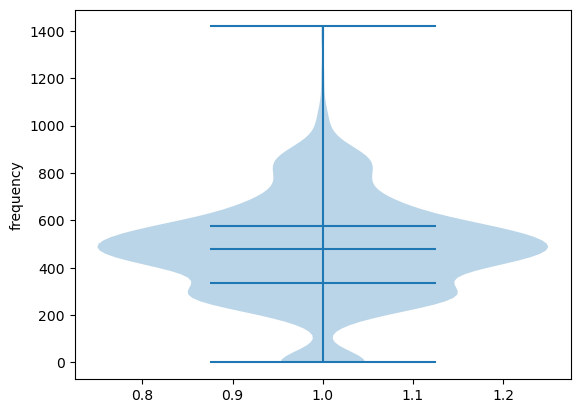

In [61]:
# create a violine plot for Garage Area
plt.violinplot(ames['GarageArea'],showextrema=True,showmedians=True,quantiles=[0.25,0.75])
plt.ylabel('frequency')
plt.show()

of the 2 graphs presented I prefer the histogram for readability and ease of explaining to non-technical audience

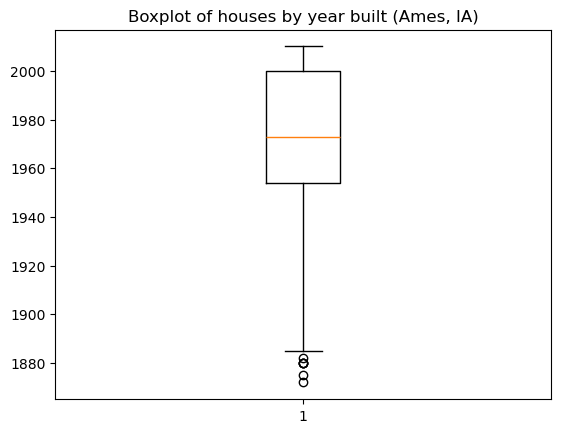

In [62]:
# create a boxplot of Year Built
plt.boxplot(ames['YearBuilt'])
plt.title('Boxplot of houses by year built (Ames, IA)')
plt.show()

In [63]:
# find the z-score for a house with a Garage Area of 600 square feet
mean_garage = np.mean(ames['GarageArea'])
sd_garage = np.std(ames['GarageArea'])
print("A house with a Garage Area of 600 square feet has a z-score of ", np.round((600-mean_garage)/sd_garage,3))
print("z score is showing the number of standard deviations from the mean")


A house with a Garage Area of 600 square feet has a z-score of  0.594
z score is showing the number of standard deviations from the mean


### Write a one paragraph summary of the distribution of the variable _TotTms AbvGrd_ (Total rooms above grade (does not include bathrooms)).  Choose an appropriate graph to go with your paragraph

It appears that homes with 5-8 rooms above ground (not including bathrooms) are the most popular, based on the data.
The distribution of rooms above ground follows a bell-shaped curve, with 6 rooms being the median and mean.
This suggests that homes with 6 rooms may be the most sought after.
Additionally, the data indicates that homes with fewer than 5 rooms or more than 8 rooms are either less popular or possibly unaffordable.


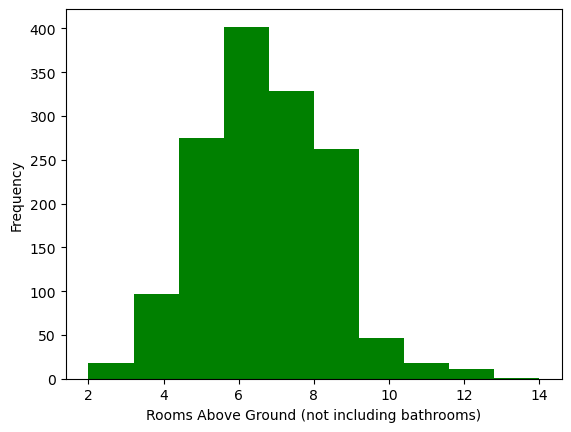

In [65]:
print("It appears that homes with 5-8 rooms above ground (not including bathrooms) are the most popular, based on the data.")
print("The distribution of rooms above ground follows a bell-shaped curve, with 6 rooms being the median and mean.")
print("This suggests that homes with 6 rooms may be the most sought after.")
print("Additionally, the data indicates that homes with fewer than 5 rooms or more than 8 rooms are either less popular or possibly unaffordable.")

plt.hist(ames['TotRmsAbvGrd'], color="Green")
plt.ylabel('Frequency')
plt.xlabel('Rooms Above Ground (not including bathrooms)')
plt.show()